# Sentiment Classification Using LSTM

**Objective**: Using Keras IMDB movie reviews, predict/classify the sentiment based on the input movie review.

**Approach:**
* Input is a sequence of words (movie review) of varying length.
* Need to understand the context based on the words.
* Try using LSTM.
* The label 1 is positive and 0 is negative.

In [1]:
import numpy as np
from keras.datasets import imdb

In [2]:
# for reproducability
np.random.seed(123)

In [12]:
?imdb.load_data

In [48]:
top_words = 5000

## train and test are split 50:50 and the dataset is balanced.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= top_words)

In [49]:
X_train.shape

(25000,)

In [50]:
X_test.shape

(25000,)

In [51]:
len(X_train[0])

218

In [52]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [53]:
y_train[0:5]

array([1, 0, 0, 1, 0])

## Convert the integers to strings

In [54]:
#mapping of words to index
word_index = imdb.get_word_index()

In [55]:
len(word_index.values())

88584

In [56]:
list(word_index.values())[0:5]

[34701, 52006, 52007, 16816, 63951]

In [57]:
list(word_index.keys())[0:5]

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']

In [58]:
# create swap map : int to words
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

In [59]:
list(reverse_word_index.values())[0:5]

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']

In [60]:
list(reverse_word_index.keys())[0:5]

[34701, 52006, 52007, 16816, 63951]

In [61]:
reverse_word_index[3]

'a'

In [62]:
def decode_review(text):
    return ' '.join(reverse_word_index[i] for i in text)

In [63]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [64]:
decode_review(X_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s and with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script 

In [65]:
decode_review(X_train[1])

"the thought solid thought and do making to is spot nomination and while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so and of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he and to makes this stretch and of solid it thought begins br and and budget worthwhile though ok and and for ever better were and and for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making and to and finds tv tend to of and these thing wants but and an and cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them"

## Prepare the Data

Define the max len for a movie review and convert all reviews to fixed length. Keras provides an utility function to achieve the same.

In [66]:
from keras.preprocessing.sequence import pad_sequences

In [81]:
X_train = pad_sequences( X_train, maxlen=500, padding='post', truncating='post')

In [67]:
?pad_sequences

In [82]:
X_test = pad_sequences( X_test, maxlen=500, padding='post', truncating='post')

In [84]:
len(X_train[0]), len(X_train[1])

(500, 500)

## Build the model

* Input: array of word indices. Each review of size 500. The Vocab size is 5000 in our case.
* Output: Single value (1/0), ie., review sentiment is Positive / Negative.

In [71]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling1D, Dense
from keras.layers import Embedding

In [75]:
?Dense

In [73]:
vocab_size = top_words

In [76]:
model = Sequential()
model.add(Embedding(vocab_size, 16, input_length=500))

# hidden
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 80,289
Trainable params: 80,289
Non-trainable params: 0
_________________________________________________________________


In [79]:
?model.compile

In [80]:
model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

## Train the model

In [86]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), verbose=1, batch_size=64)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 54us/step - loss: 0.1544 - acc: 0.9443 - val_loss: 0.3898 - val_acc: 0.8540
Epoch 2/15
25000/25000 [==============================] - 1s 54us/step - loss: 0.1513 - acc: 0.9447 - val_loss: 0.3477 - val_acc: 0.8718
Epoch 3/15
25000/25000 [==============================] - 1s 53us/step - loss: 0.1491 - acc: 0.9463 - val_loss: 0.3577 - val_acc: 0.8691
Epoch 4/15
25000/25000 [==============================] - 1s 54us/step - loss: 0.1457 - acc: 0.9476 - val_loss: 0.3661 - val_acc: 0.8676
Epoch 5/15
25000/25000 [==============================] - 1s 53us/step - loss: 0.1418 - acc: 0.9498 - val_loss: 0.4187 - val_acc: 0.8534
Epoch 6/15
25000/25000 [==============================] - 1s 54us/step - loss: 0.1401 - acc: 0.9503 - val_loss: 0.3808 - val_acc: 0.8671
Epoch 7/15
25000/25000 [==============================] - 2s 67us/step - loss: 0.1391 - acc: 0.9506 - val_loss: 0.3920 - val_acc

In [87]:
from sklearn.metrics import confusion_matrix


In [88]:
score = model.evaluate(X_test, y_test)

25000/25000 [==============================] - 0s 16us/step


In [89]:
print(score)

[0.45980843440055846, 0.85456]


## Predict

In [90]:
pred = model.predict(X_test)

In [92]:
pred[0:5]

array([[0.03416876],
       [0.9999738 ],
       [0.07809988],
       [0.95715886],
       [0.9927071 ]], dtype=float32)

In [97]:
pred = [1 if i > 0.5 else 0 for i in pred]

In [98]:
pred[0:5]

[0, 1, 0, 1, 1]

In [99]:
cm = confusion_matrix(y_test, pred)

In [100]:
print(cm)

[[10906  1594]
 [ 2042 10458]]


In [102]:
import seaborn as sns

/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


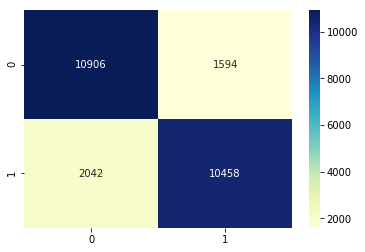

In [105]:
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

In [107]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

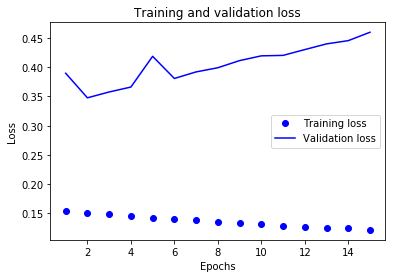

In [108]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

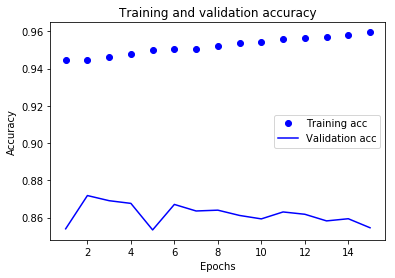

In [109]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Build Model Using LSTM

In [110]:
from keras.layers import LSTM

In [112]:
model2 =  Sequential()
model2.add(Embedding(vocab_size, 16, input_length=500))

# hidden
#model2.add(GlobalAveragePooling1D())
model2.add(LSTM(100))

# output
model2.add(Dense(1, activation='sigmoid'))

In [113]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 126,901
Trainable params: 126,901
Non-trainable params: 0
_________________________________________________________________


In [114]:
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [115]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=64)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
 4480/25000 [====>.........................] - ETA: 2:18 - loss: 0.6932 - acc: 0.5027

KeyboardInterrupt: 